# Heart Disease Prediction with Logistic Regression

In this notebook, we analyze the Heart Disease dataset to predict the presence of heart disease using Logistic Regression. We perform data exploration, preprocessing, model training, and evaluation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('heart_disease_data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# '1' represents defective heart
# '0' represents healthy heart

In [8]:
X = df.drop(columns='target', axis =1)

In [9]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [10]:
Y = df['target']

In [11]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# Splitting Dataset into Train and Test

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=23)

In [13]:
print(X_test.shape, X_train.shape)

(61, 13) (242, 13)


# Training the model with data

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train, Y_train)

C:\Users\nikun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
Y_pred = model.predict(X_test)

In [17]:
Y_train

61     1
83     1
103    1
160    1
119    1
      ..
251    0
167    0
201    0
281    0
79     1
Name: target, Length: 242, dtype: int64

In [18]:
score = accuracy_score(Y_test, Y_pred)

In [19]:
print("The accuracy score is: ", score)

The accuracy score is:  0.8524590163934426


# Building a predictive system

In [20]:
input_data = [62,0,0,140,268,0,0,160,0,3.6,0,2,2]
arr= np.array(input_data)

In [22]:
print(arr)

[ 62.    0.    0.  140.  268.    0.    0.  160.    0.    3.6   0.    2.
   2. ]


In [23]:
prediction = model.predict(arr.reshape(1,-1))

C:\Users\nikun\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
print(prediction)

[0]


In [25]:
if prediction == 0:
    print("You are healthy")
else:
    print("Consult your doctor")

You are healthy


# Visual Exploratory Data Analysis (EDA)

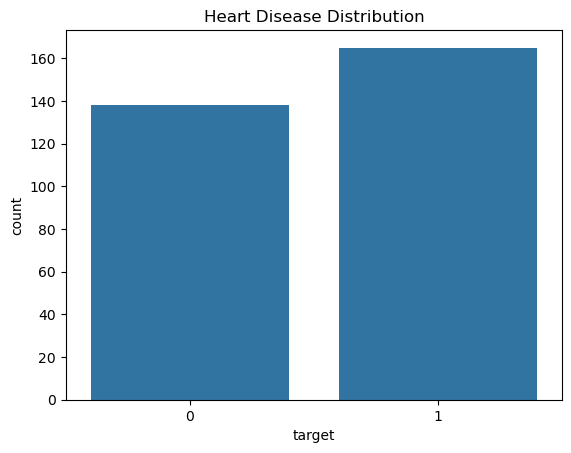

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='target')
plt.title('Heart Disease Distribution')
plt.show()

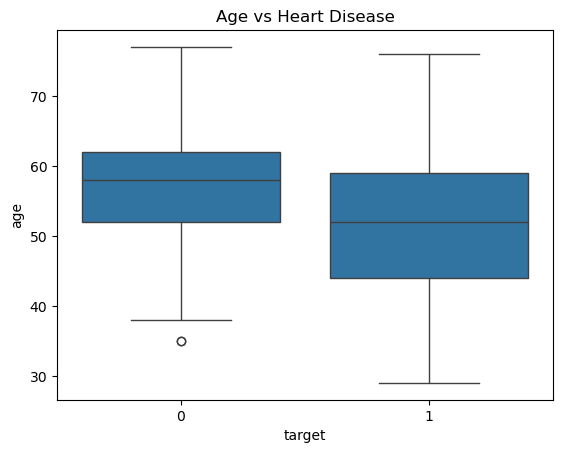

In [27]:
sns.boxplot(data=df, x='target', y='age')
plt.title('Age vs Heart Disease')
plt.show()

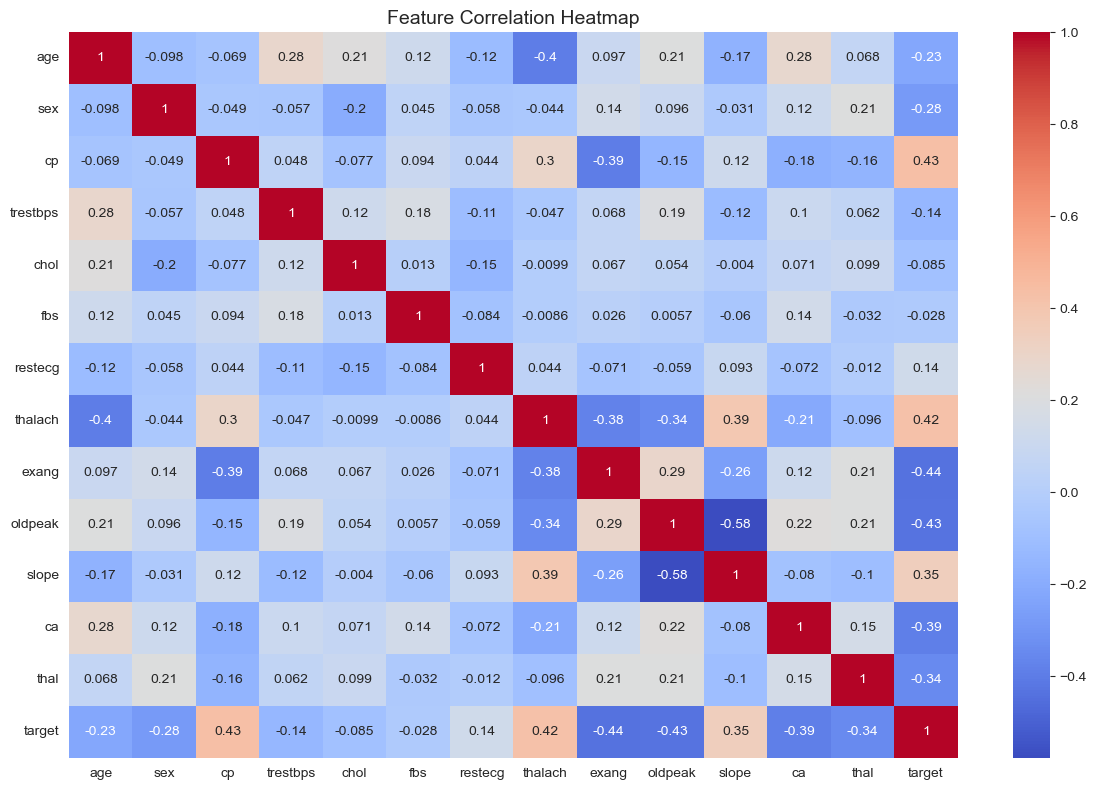

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 10})
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\nikun\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


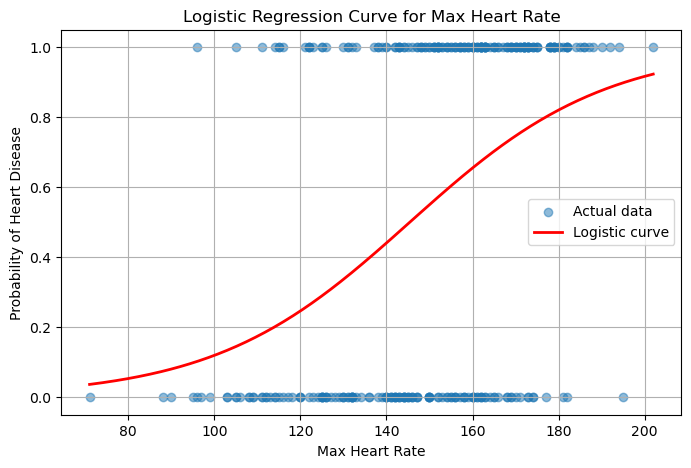

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Choose one numerical feature (e.g., thalach = max heart rate)
X_feature = df[['thalach']]
y_target = df['target']

# Train logistic regression on single feature
model = LogisticRegression()
model.fit(X_feature, y_target)

# Create curve points
X_test = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Plot data points and sigmoid curve
plt.figure(figsize=(8, 5))
plt.scatter(X_feature, y_target, alpha=0.5, label='Actual data')
plt.plot(X_test, y_prob, color='red', linewidth=2, label='Logistic curve')
plt.xlabel('Max Heart Rate')
plt.ylabel('Probability of Heart Disease')
plt.title('Logistic Regression Curve for Max Heart Rate')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion
We built a logistic regression model that performs well in predicting heart disease. Key features like chest pain type and max heart rate show strong influence.